In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [6]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [7]:
tokenizer = info.features['text'].encoder

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 110s 281ms/step - loss: 0.6794 - accuracy: 0.5535 - val_loss: 0.6733 - val_accuracy: 0.5836
Epoch 2/10
391/391 [==============================] - 109s 280ms/step - loss: 0.5935 - accuracy: 0.6888 - val_loss: 0.6737 - val_accuracy: 0.5795
Epoch 3/10
391/391 [==============================] - 110s 281ms/step - loss: 0.5355 - accuracy: 0.7356 - val_loss: 0.6075 - val_accuracy: 0.6819
Epoch 4/10
391/391 [==============================] - 110s 282ms/step - loss: 0.4474 - accuracy: 0.8047 - val_loss: 0.5109 - val_accuracy: 0.7530
Epoch 5/10
391/391 [==============================] - 109s 278ms/step - loss: 0.2987 - accuracy: 0.8795 - val_loss: 0.3349 - val_accuracy: 0.8612
Epoch 6/10
391/391 [==============================] - 106s 271ms/step - loss: 0.2099 - accuracy: 0.9194 - val_loss: 0.3509 - val_accuracy: 0.8576
Epoch 7/10
391/391 [==============================] - 106s 272ms/step - loss: 0.1556 - accuracy: 0.9439 - val_loss: 0.3397 -

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

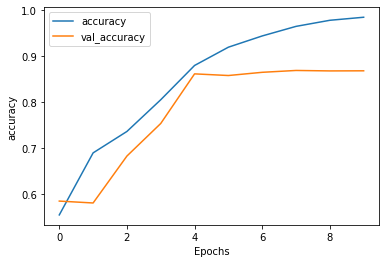

In [14]:
plot_graphs(history, 'accuracy')

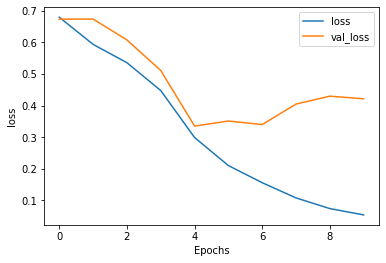

In [15]:
plot_graphs(history, 'loss')